# Train-the-Trainer Hands-on Workshop: Deep Learning Intro
Benjamin Bergner, Stefan Konigorski, Matthias Kirchler (Hasso Plattner Institut)
20. November 2020

Willkommen zum zweiten Part des Algorithmen Workshops.

## Agenda

<a name="Agenda"></a>

| Inhalt | Zeit |
| :--- | :---: |
| Einführung | 10:00 - 10:15 |
| 1) Einführung in Machine Learning mit scikit-learn | 10:15 - 11:00|
|  a) Klassische Vorhersagemodelle | |
|  b) Unüberwachtes Lernen mit Clusteranalyse & PCA | |
| Übungen in scikit-learn in Kleingruppen | 11:00 - 11:30|
| Besprechung der Ergebnisse | 11:30 - 11:45|
| Pause | 11:45 - 12:15|
| 2) Einführung in Deep Learning mit fast.ai | 12:15 - 13:00|
| Projektarbeit in fast.ai - Kleingruppen | 13:00 - 13:30|
| Besprechung der Ergebnisse | 13:30 - 13:45|
| Abschluss | 13:45 - 14:00|

## Vorbemerkung
Bevor Sie mit der Ausführung beginnen, sollten Sie den Laufzeittyp ("runtime type", falls Ihre Sprache auf Englisch eingestellt ist) auf "GPU" ändern: 

1.

<img src="https://drive.google.com/uc?export=view&id=1uTzSVK4BCAUwxJ1a1b-mB86jwZ_cbFAR" width="400"/>


2.

<img src="https://drive.google.com/uc?export=view&id=11dDC7mx-MyoNIx0jyTiiT4RLtEPmi-aO" width="400"/>


Als nächstes müssen Sie die folgende Zeile ausführen um benötigte Software zu installieren.

Die Fehlermeldung `ERROR: fastai 2.0.6 has requirement fastcore>=1.0.0, but you'll have fastcore 0.1.38 which is incompatible.` können Sie ignorieren. Sollten andere Fehler auftreten, wenden Sie sich bitte an einen der Moderatoren.

In [1]:
# Diese Zeile muss am Anfang ein mal ausgeführt werden. Danach müssen Sie sie nicht mehr ausführen
! pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
! pip install fastai==2.0.6
! pip install fastcore==0.1.38

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 708.0MB 25kB/s 
     |████████████████████████████████| 5.9MB 64.8MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 358kB 18.5MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: fastai 2.0.6 has requirement fastcore>=1.0.0, but you'll have fastcore 0.1.38 which is incompatible.
  Found existing installation: fastcore 1.3.19
    Uninstalling fastcore-1.3.19:
      Successfully uninstalled fastcore-1.3.19


## fast.ai
<img style="float: left;" src="https://www.fast.ai/images/Fast.ai.png" width=250>
Für Deep Learning benötigen wir eine andere Softwarebibliothek als für klassisches Machine Learning. In fast.ai sind viele Deep Learning Algorithmen vorimplementiert und die meisten Standardoperationen sind automatisiert, so dass mithilfe von wenigen Zeilen Code, ein komplettes tiefes neuronales Netzwerk trainiert werden kann. 

In [2]:
# Wir binden fast.ai und eine Helferfunktion so ein:
from os import path as osp
from fastai.vision.all import *

# Ein erstes tiefes neuronales Netzwerk
<hr>

## Ziel

Wir lernen die Grundlagen, wie man Bilder in fast.ai einliest und damit ein erstes neuronales Netzwerk trainiert.
<hr>

## Methoden

* Klassifikation von Bilddaten
* Convolutional Neural Networks

<hr>

## Vorbereitung: Laden von Bilddaten

In der nächsten Zelle wird ein Datensatz von verschiedenen Hunderassen automatisch heruntergeladen. Die Details sind an dieser Stelle nicht wichtig.

In [3]:
path_to_data = 'data/imagewoof2-160'
if not osp.isdir(path_to_data):
  os.makedirs(path_to_data, exist_ok=True)
  ! wget https://www.dropbox.com/s/83f1a0lz3fwlytw/imagewoof2-160.tar -O data/imagewoof2-160.tar
  ! tar -xf data/imagewoof2-160.tar -C data

--2021-02-09 10:46:29--  https://www.dropbox.com/s/83f1a0lz3fwlytw/imagewoof2-160.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/83f1a0lz3fwlytw/imagewoof2-160.tar [following]
--2021-02-09 10:46:30--  https://www.dropbox.com/s/raw/83f1a0lz3fwlytw/imagewoof2-160.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd3cd7e890f540cde855c3c6e1e.dl.dropboxusercontent.com/cd/0/inline/BIlP-81ckvFn_H3S5rNquaA6XlARCDCXZdX6lWyruoQRlSRGdWeYwk-5VHhs5bFHrNgkw3ymGLvQ_SUpDwtlMDwLKZWsvZEV4jJAe_Lj7pNTRM97FHdTjG-toxe_ZERHr3o/file# [following]
--2021-02-09 10:46:30--  https://ucd3cd7e890f540cde855c3c6e1e.dl.dropboxusercontent.com/cd/0/inline/BIlP-81ckvFn_H3S5rNquaA6XlARCDCXZdX6lWyruoQRlSRGdWeYwk-5VHhs5bFHrNgkw3ymGLvQ_SUpDwtlMDwLKZWsv

Als nächstes laden wir diesen Datensatz in einen `ImageDataLoader`, also einen Helfer, der für uns die Bilder automatisch lädt:

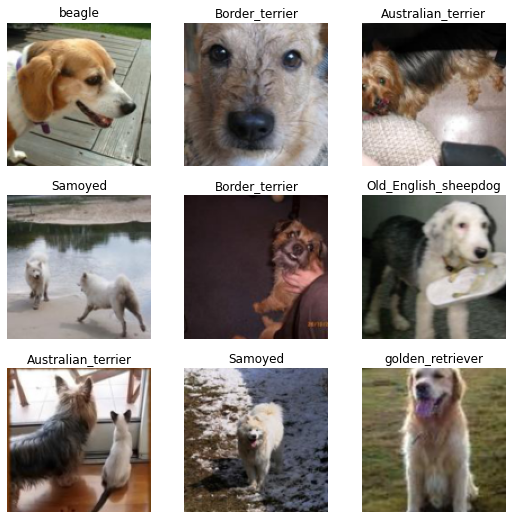

In [4]:
size = 128
data = ImageDataLoaders.from_folder(
    path_to_data,
    train='train',
    valid='val',
    item_tfms=[Resize(size)],
)
data.show_batch()

## Der erste Trainingsversuch

Und jetzt können wir schon ein neuronales Netzwerk trainieren! Wir verwenden den Befehl `cnn_learner` um automatisch ein Convolutional Neural Network vorbereitet zu bekommen. An dieser Stelle verwenden wir ein sogenanntes "ResNet" der Tiefe 18.

In [5]:
learner = cnn_learner(data, resnet18, metrics=error_rate, pretrained=False)
# der Befehl `fit` sagt dem Netzwerk, dass es trainieren soll
learner.fit(6, lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,3.831289,6.266621,0.888776,00:25
1,3.184960,2.675310,0.852889,00:25
2,3.616242,1740.114258,0.879613,00:25
3,3.514976,3.058525,0.897429,00:25
4,3.643195,2194.271729,0.895648,00:25
5,3.251433,2.906576,0.894121,00:25


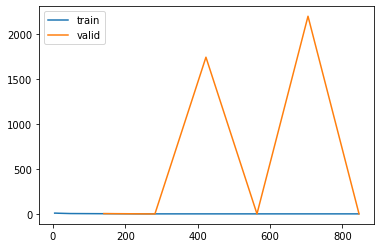

In [6]:
# zeige an, wie sich das CNN geschlagen hat
learner.recorder.plot_loss()

**Was für eine Enttäuschung!** -- was haben wir falsch gemacht?

# Verbesserung 1: - Die Lernrate // Learning Rate

<img style="float: left;" src="https://miro.medium.com/max/2796/1*6Zr7nkI97IGT9e_tpgK-_g.png" width=800>

Die Lernrate beschreibt, wie große Schritte das Neuronale Netzwerk in jedem Trainingsabschnitt weitergeht. Ist die Lernrate klein, so lernt das Netzwerk ändert das Netzwerk in jedem Schritt nur sehr wenig. Ist die Lernrate groß, kann das Netzwerk auch größere Schritte tun, aber es wird auch häufig über das Ziel hinausschießen. Ein Kompromiss muss gefunden werden!

In [7]:
# wir laden das CNN neu; sonst "erinnert" es sich an den letzen Trainingsversuch!
learner = cnn_learner(data, resnet18, metrics=error_rate, pretrained=False)

`fast.ai` ermöglicht es, die ideale Lernrate automatisch zu bestimmen!

Die empfohlene Lernrate ist: 0.00479


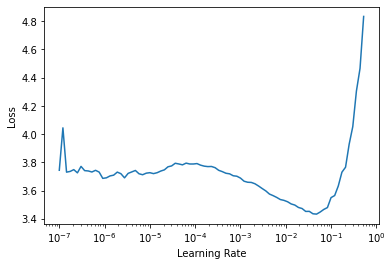

In [8]:
suggested_lr = learner.lr_find().lr_min
print(f'Die empfohlene Lernrate ist: {suggested_lr:.5f}')

In [9]:
learner.fit(6, lr=suggested_lr)

epoch,train_loss,valid_loss,error_rate,time
0,2.643210,2.343088,0.814711,00:25
1,2.456766,111.065186,0.914737,00:25
2,2.306583,2.446186,0.795368,00:25
3,2.227496,2.008368,0.711122,00:25
4,2.119368,2.354644,0.789259,00:25
5,2.002849,2.351493,0.654620,00:25


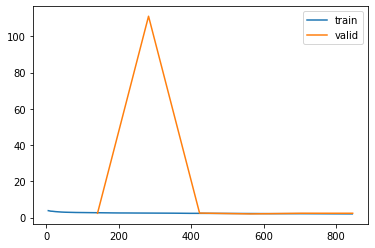

In [10]:
learner.recorder.plot_loss()

# Verbesserung 2: - Datenerweiterung // Data Augmentation
Neuronale Netzwerke funktionieren am besten, wenn sie viele Daten haben - je mehr, desto besser! Unser Datensatz ist allerdings ziemlich klein, verglichen mit anderen Deep Learning Datensätzen (ca 10 000 Bilder mit ca  1 000 Bildern pro Klasse). Idealerweise würden wir unseren Datensatz einfach vergrößern, indem wir mehr Bilder mit hinzunehmen. Das ist meist allerdings mit sehr viel Mehraufwand und Kosten verbunden.

Hier kommt die Datenerweiterung ins Spiel: anstatt viele neue Bilder zusammenzusuchen, können wir die Bilder, die wir schon haben einfach aufblähen. Ein Bild von einem Hund, das vertikalgespiegelt wurde, stellt immer noch (fast) den gleichen Hund dar - für das Neuronale Netzwerk jedoch sehen beide Bilder extrem verschieden aus!

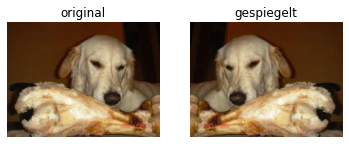

In [11]:
image = data.train_ds[5][0]
_, ax = subplots(1, 2)
show_image(image, ctx=ax[0], title='original')
show_image(image.flip_lr(), ctx=ax[1], title='gespiegelt')

Was können wir noch machen, außer das Bild zu spiegeln?
* kleine oder große Rotationen
* Zentrum des Bildes innerhalb des Bildes verschieben und reinzoomen
* Belichtung und Kontrast
* Perspektivveränderungen
* ...

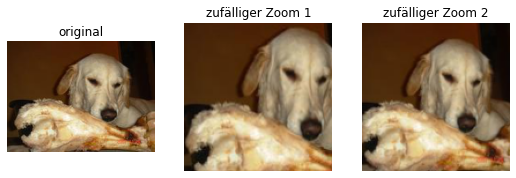

In [12]:
image = data.train_ds[5][0]
_, ax = subplots(1, 3)
rrc = RandomResizedCrop(128, min_scale=0.35)
show_image(image, ctx=ax[0], title='original')
show_image(rrc(image), ctx=ax[1], title='zufälliger Zoom 1')
show_image(rrc(image), ctx=ax[2], title='zufälliger Zoom 2')

Und wie binden wir das jetzt ins Training ein?
In `fast.ai` werden Data Augmentations (häufig "transforms" oder kurz "tfms" genannt) über `item_tfms` und `batch_tfms` and den Datensatz übergeben. Der Unterschied zwischen `item_tfms` und `batch_tfms` ist für uns nicht wichtig - jede Bildtransformation gehört entweder ins eine oder ins andere.


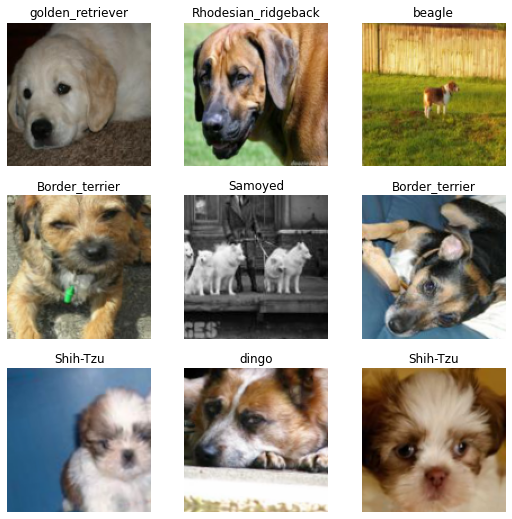

In [13]:
size = 128
item_tfms = [
    # zufälliger Zoom
    RandomResizedCrop(size, min_scale=0.35),
    # zufällige vertikale Spiegelung
    FlipItem(0.5),
]
batch_tfms = [
    # zufällige Rotation um maximal 10°; in 50% der Bilder
    Rotate(max_deg=10, p=0.5),
    # zufällige Helligkeitsveränderung um maximal 10%; in 50% der Bilder
    Brightness(max_lighting=0.1, p=0.5)
]
data = ImageDataLoaders.from_folder(
    'data/imagewoof2-160/',
    train='train',
    valid='val',
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
)
data.show_batch()

In [14]:
learner = cnn_learner(data, resnet18, metrics=error_rate, pretrained=False)

Die empfohlene Lernrate ist: 0.00398


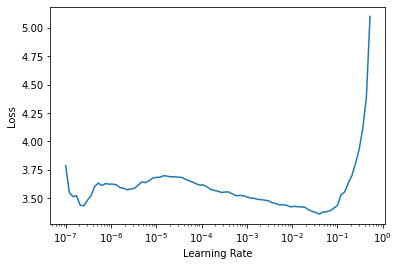

In [15]:
suggested_lr = learner.lr_find().lr_min
print(f'Die empfohlene Lernrate ist: {suggested_lr:.5f}')

In [16]:
learner.fit(6, lr=suggested_lr)

epoch,train_loss,valid_loss,error_rate,time
0,2.653483,2.910753,0.893103,00:26
1,2.384853,2.319300,0.829728,00:26
2,2.326766,2.249389,0.775006,00:26
3,2.254541,2.712995,0.760499,00:26
4,2.264781,10.434862,0.863578,00:26
5,2.229294,2.207302,0.717740,00:26


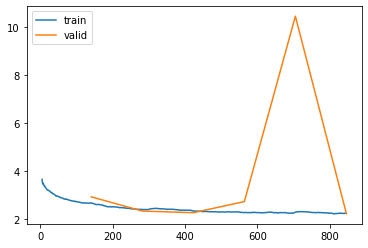

In [17]:
learner.recorder.plot_loss()

**Immer noch weit weg von unserem Ziel!**


# Andere Ideen

**Möglichkeit 1: länger trainieren!**
    Und das funktioniert meist auch ganz gut, zu einem gewissen Grad. In unserem Beispiel etwa habe ich genau den gleichen Code mit 64 Epochen (ca 10-15 Minuten auf lokalem Server statt Google Colab) durchlaufen lassen und die Fehlerrate fällt auf etwa **27%**, eine deutliche Verbesserung. Die Datenerweiterung entfaltet ihre volle Kraft auch erst bei deutlich mehr als 10 Trainingsepochen. Aber dafür haben wir doch jetzt keine Zeit!
    
**Möglichkeit 2: kompliziertere Trainingsalgorithmen.**
    Funktioniert manchmal besser, manchmal nicht

**Möglichkeit 3: andere Netzwerkarchitektur.**
    In unserem Beispiel haben wir ein `ResNet18` verwendet, ein Standardnetzwerk mit ca 18 Layern. Wir könnten ein tieferes oder weniger tiefes Netzwerk verwenden (zB `ResNet50` mit 50 Layern), oder eine andere Art von Architektur. Da wir allerdings nur relativ wenige Datenpunkte haben, werden wir nicht viel von tieferen Architekturen profitieren, und in vielen Anwendungen sind `ResNets` der state-of-the-art, oder zumindest nah daran.
    
    
oder:

# Verbesserung 3: Transferlernen // Transfer Learning
Die Idee beim Transferlernen ist, dass Neuronale Netze aus Erfahrung lernen können. Wir können unser Netzwerk zuerst auf einem riesigen und allgemeinen Datensatz "vortrainieren" und dann das gleiche Netzwerk auf unserem kleinen, speziellen Datensatz wiederverwenden. Das tolle daran: wir müssen das Netzwerk nur ein einziges mal vortrainieren um es dann immer und immer wieder auf verschiedene Anwendungsfälle anwenden zu können. Und da das nur einmal gemacht werden muss, haben das andere Leute für uns bereits getan und wir müssen `fast.ai` einfach nur sagen, dass wir ein vortrainiertes Netzwerk haben wollen!


Der einzige Unterschied beim Laden des Netzwerkes ist das `pretrained=True` Argument!

In [18]:
learner = cnn_learner(data, resnet18, metrics=error_rate, pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Beim trainieren könnten wir wieder die gleiche Funktion wie zuvor nehmen `learner.fit(12, lr=suggested_lr)`. Dies ist aber nicht optimal - um das meiste aus dem vortrainierten Netzwerk zu holen, verwenden wir die Funktion: `learner.fine_tune(freeze_epochs=4, epochs=8)`. Wir lassen an dieser Stelle auch die Lernrate aus - sie kann festgelegt werden, aber der Einfachheit halber überlassen wir das hier der `fast.ai` Bibliothek.

In [19]:
learner.fine_tune(freeze_epochs=1, epochs=6)

epoch,train_loss,valid_loss,error_rate,time
0,1.181197,0.667955,0.207941,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.741824,0.552083,0.170272,00:26
1,0.638721,0.484132,0.151693,00:26
2,0.536701,0.466141,0.143548,00:26
3,0.422666,0.430753,0.131077,00:26
4,0.345273,0.425408,0.131840,00:26
5,0.314221,0.422771,0.133113,00:26


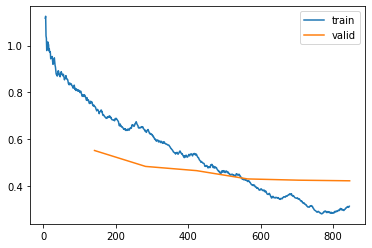

In [20]:
learner.recorder.plot_loss()

**Et voilà!**

Wir schaffen es fast zu 10% Fehlerrate, während "zufälliges Raten" eine Fehlerrate von ~90% hätte! Die Unterscheidung verschiedener Hunderassen ist ein anspruchsvolles Problem, aber wir haben es geschafft, innerhalb von 45 Minuten ein durchaus akzeptables Vorhersagemodell zu trainieren!